<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/AprendizajePorRefuerzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuración de Python

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
    !pip install -q -U tf-agents pyvirtualdisplay gym[atari]
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [52.7 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ge

#  Introducción a OpenAI gym

Se utilizará [OpenAI gym](https://gym.openai.com/), como paquete básico para la simulación de ambientes/entornes orientados al entrenameinto de algoritmos de Aprendizaje por Refuerzo.

In [2]:
import gym
gym.envs.registry.all() #entornos disponibles

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

- El Cart-Pole es un escenario de simulación simple que permite movilizar a izquierda a derecha un carro con mastil.

- El agente debe mover el carro con el fin de mantener el mastil en vertical.

In [3]:
env = gym.make('CartPole-v1') #creamos el ambiente cartpole

Se inicializa el escenario:

In [4]:
env.seed(42)
obs = env.reset()#retorna una observación

- La observación varia según el escenario.
- En este caso es un numpy array con cuatro floats: posición horizontal, velocidad, ángulo del mastil (0 = vertical), y velocidad angular.

In [5]:
print(obs)

[-0.01258566 -0.00156614  0.04207708 -0.00180545]


-Un escenario puede ser vizualizado mediante el método `render()`.

**Warning**: algunos escanrios acceden a la pantalla para realizar el render, generando una nueva ventana. Para evitar problemas con el manejo de la pantalla en Jupyter o .ipynb se instala un servidor falso [Xvfb](http://en.wikipedia.org/wiki/Xvfb). 

In [6]:
try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

In [7]:
display

In [8]:
env.render() # metodo render

True

Se activa el `mode="rgb_array"` para obtener una imagen del escenario como array de numpy:

In [9]:
img = env.render(mode="rgb_array")
img.shape

(400, 600, 3)

In [10]:
def plot_environment(env, figsize=(5,4)):#funcion para graficar escenario como imagen rgb
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

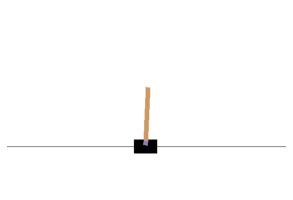

In [11]:
plot_environment(env)
plt.show()

- Cómo interactuar con el escenario?
-El agente debe escoger una acción del "action space"

In [12]:
env.action_space

Discrete(2)

Acciones disponibles: acelerar a izquierda o derecha

In [13]:
action = 1  # accelerate right
obs, reward, done, info = env.step(action)
obs

array([-0.01261699,  0.19292789,  0.04204097, -0.28092127])

- El carro se mueve a derecha (obs[1] > 0). 
-El mastil esta hacia la derecha (obs[2] > 0).
- Velocidad angular es negativa (obs[3] < 0).
- El mastil debe moverse a izquierda en el siguiente paso.

Saving figure cart_pole_plot


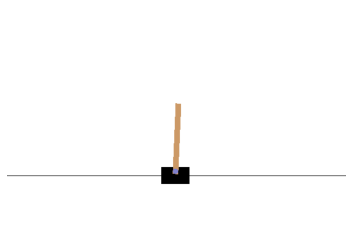

In [14]:
plot_environment(env)
save_fig("cart_pole_plot")

- El escenari también informa sobre la recompensa obtenida en el última paso:

In [15]:
reward

1.0

- Si el juego termina:

In [16]:
done

False

- `info` es un diccionario que provee información específica del escanario, por ejemplo: vidas restantes

In [17]:
info

{}

- La secuencia de pasos en el escenario desde el reset hasta done=True se conoce como "episode". 
- Al final de un (i.e., cuando `step()` retorna `done=True`), se debe resetear el escenario.

In [18]:
if done:
    obs = env.reset()

- Se necesita de una _policy_ para que el agente realice bien su trabajo. 

- Policy se refiere a la estrategia que seguira el agente para seleccionar una acción en cada paso.

- Puede tener en cuenta los pasos y acciones del pasado para decidir qué hacer!

# Policy simple

- Si el mastil se inclina a izquierda, empuja hacia la izquierda, y  _vice versa_. 

In [19]:
env.seed(42)

def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

In [20]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(41.718, 8.858356280936096, 24.0, 68.0)

- Logró mantenerse vertical por 68 pasos! 
- El escenario es considerado exitoso para esta tarea si logra mantenerse al menos para 200 pasos.

In [21]:
env.seed(42)

frames = []

obs = env.reset()
for step in range(200):
    img = env.render(mode="rgb_array")
    frames.append(img)
    action = basic_policy(obs)

    obs, reward, done, info = env.step(action)
    if done:
        break

In [22]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [23]:
plot_animation(frames)

# Neural Network Policies

- Se creará una red neuronal que obtendrá las observaciones como entrada y
estimará en la salida las probabilidades de las acciones a tomar por cada entrada (observación).

- Para escoger una acción, la red estimará la probabilidad de cada acción, y seleccionará la acción de forma aleatoria con base a las probabilidades estimadas.

- Para este caso del Cart-Pole, hay solo dos posibles acciones (izquierda y derecha), por ende solo se requiere una neurona de salida.

- La neurona estimará la probabilidad `p` para la acción izquierda (0) y `1 - p` será derecha (1)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

n_inputs = 4 # == env.observation_space.shape[0] #espacio de observaciones en cart-pole

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid"),
])

- En este caso las acciones del pasado se pueden ignorar dado que el espacio de observaciones contiene la información completa del estado del ambiente (estado completo).

- Si se necesitaran hidden states (estados ocultos) se requerirían acciones y observaciones del pasado para inferir dichos estados ocultos del escenario. 

- **Ejemplo**: si el ambiente solo revelara la posición de  cart pero no su velocidad, deberian considerarse observaciones previas para inferir dicha variable. (Si el ambiente fuera ruidoso seria conveniente tener información del pasado).

**NOTA:** Se escoge una acción con base a las probabilidades estimadas para que el agente encuentre un balance entre _exploring_ nuevas acciones y _exploiting_ las acciones que se saben son buenas.

## Modelo no entrenado - aleatorio

In [ ]:
def render_policy_net(model, n_max_steps=200, seed=42): 
    frames = []
    env = gym.make("CartPole-v1")
    env.seed(seed)
    np.random.seed(seed)
    obs = env.reset()
    for step in range(n_max_steps):
        frames.append(env.render(mode="rgb_array"))
        left_proba = model.predict(obs.reshape(1, -1))
        action = int(np.random.rand() > left_proba)
        obs, reward, done, info = env.step(action)
        if done:
            break
    env.close()
    return frames

In [ ]:
frames = render_policy_net(model)
plot_animation(frames)

- La red jugará en 50 diferentes escenarios en paralelo (ofrece una variedad de lotes de entrenamiento en cada paso), y se entrena para 5000 iteraciones.

- Se deben resetear los ambientes una vez se termine cada escenario (done True en el vector de observaciones).

- Se entrena el modelo con un lazo custom.

In [ ]:
n_environments = 50
n_iterations = 5000

envs = [gym.make("CartPole-v1") for _ in range(n_environments)] # crear lista de escenarios
for index, env in enumerate(envs):
    env.seed(index)
np.random.seed(42)
observations = [env.reset() for env in envs]
optimizer = keras.optimizers.RMSprop()
loss_fn = keras.losses.binary_crossentropy #funcion de costo tipo clasificacion

for iteration in range(n_iterations):
    # if angle < 0, we want proba(left) = 1., or else proba(left) = 0.
    target_probas = np.array([([1.] if obs[2] < 0 else [0.])
                              for obs in observations]) # acciones "ideales"
    with tf.GradientTape() as tape: #gradiente automatico
        left_probas = model(np.array(observations))
        loss = tf.reduce_mean(loss_fn(target_probas, left_probas))
    print("\rIteration: {}, Loss: {:.3f}".format(iteration, loss.numpy()), end="")
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    actions = (np.random.rand(n_environments, 1) > left_probas.numpy()).astype(np.int32)
    for env_index, env in enumerate(envs):
        obs, reward, done, info = env.step(actions[env_index][0])
        observations[env_index] = obs if not done else env.reset()

for env in envs:
    env.close()

Iteration: 4999, Loss: 0.094

In [ ]:
frames = render_policy_net(model)
plot_animation(frames)

- La estrategia fue aprendida por la red.

- Podrán generarse mejores estrategias por la propia red?

# Policy Gradients

- Para entrenar esta red se requieren definir las probabilidades objetivo `y`. 

- Si una acción es buena, deberiamos incrementar su  probabilidad, si es mala reducirla.

- Cómo saber si es buena o mala?, algunas accionespueden tener efectos retardados, dado que cuando se ganan o pierden puntos no se sabe de forma clara que acciones contribuyeron  (the _credit assignment problem_).

- _Policy Gradients_ juega múltiples episodios y luego toma acciones de episiodios como más probables, mientras que acciones de malos episiodios como poco probables.

- **Jugamos primero y luego revisamos que funcionó**

- Creamos una función para jugar.

- Se asume que la acción correcta es la derecha (1).

- Se calcula el costo y sus gradientes (se guardarán y luego se modifican dependiendo de que tan buena o mala resultó la acción).

In [51]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        action = (tf.random.uniform([1, 1]) > left_proba)
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, info = env.step(int(action[0, 0].numpy()))
    return obs, reward, done, grads

- Si `left_proba` es alta, `action` tenderá  a `False`. 
- Si se obtiene `False` significa 0 en el casteo a flotante, `y_target` será 1 - 0 = 1. 
- Fijamos el objetivo a 1, pretendiendo que la probabilidad de ir a izquierda debería ser 100%.

Se crea una función que desde `play_one_step()` juega múltiples episodios, retornando los rewards y gradients:

In [52]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = play_one_step(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

The Policy Gradients algorithm uses the model to play the episode several times (e.g., 10 times), then it goes back and looks at all the rewards, discounts them and normalizes them. So let's create couple functions for that: the first will compute discounted rewards; the second will normalize the discounted rewards across many episodes.

In [53]:
def discount_rewards(rewards, discount_rate):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_rate
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

Say there were 3 actions, and after each action there was a reward: first 10, then 0, then -50. If we use a discount factor of 80%, then the 3rd action will get -50 (full credit for the last reward), but the 2nd action will only get -40 (80% credit for the last reward), and the 1st action will get 80% of -40 (-32) plus full credit for the first reward (+10), which leads to a discounted reward of -22:

In [54]:
discount_rewards([10, 0, -50], discount_rate=0.8)

array([-22, -40, -50])

To normalize all discounted rewards across all episodes, we compute the mean and standard deviation of all the discounted rewards, and we subtract the mean from each discounted reward, and divide by the standard deviation:

In [55]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_rate=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [56]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_rate = 0.95

In [57]:
optimizer = keras.optimizers.Adam(lr=0.01)
loss_fn = keras.losses.binary_crossentropy

In [58]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[4]),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [ ]:
env = gym.make("CartPole-v1")
env.seed(42);

for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn)
    total_rewards = sum(map(sum, all_rewards))                     # Not shown in the book
    print("\rIteration: {}, mean rewards: {:.1f}".format(          # Not shown
        iteration, total_rewards / n_episodes_per_update), end="") # Not shown
    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_rate)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

env.close()

Iteration: 62, mean rewards: 80.1

In [ ]:
frames = render_policy_net(model)
plot_animation(frames)

# Procesos de Decisión de Markov y Q-value iteration

**Ejemplo 1** Simular una secuencia de longitud fija dado una matriz de transición

In [24]:
def MC_evolve(A,T=10):
  #T number of step to evolve
  M = A.shape[0] #Number of states
  s = np.argmax(np.random.multinomial(1, np.ones(M)/M))
  seq = [s]
  for t in range(T-1):
    s = np.argmax(np.random.multinomial(1, A[s,:]))
    seq.append(s)
  
  return seq

In [25]:
A = np.array([[0.7 ,0.2 ,0   ,0.1],
              [0   ,0   ,0.9 ,0.1],
              [0   ,1.0 ,0   ,0],
              [0   ,0   ,0   ,1]])

print('State transition matrix')
print(A)

print('MC sequence:')
MC_evolve(A,5)

State transition matrix
[[0.7 0.2 0.  0.1]
 [0.  0.  0.9 0.1]
 [0.  1.  0.  0. ]
 [0.  0.  0.  1. ]]
MC sequence:


[1, 2, 1, 2, 1]

**Ejemplo 2** Simular una secuencia estado-acción de longitud finita dado un proceso de decisión de Markov, asumiendo que todas las acciones son igualmente probables (no hay sesgo de estrategia - policy).

In [26]:
def MDP_evolve(MDP,T=10):
  #T number of step to evolve
  N = len(MDP['A']) #Number of states
  
  #Initial state:
  s = np.argmax(np.random.multinomial(1, np.ones(N)/N))  

  seq = []
  
  for t in range(T-1):
    #Choose an action:
    a_s = MDP['a'][s] #Possible actions
    Na = len(a_s)     #Number of possible actions
    index = np.argmax(np.random.multinomial(1, np.ones(Na)/Na)) #All actions are equally probable
    a = MDP['a'][s][index] #Chosen action

    #Sample the next state:
    s_next = np.argmax(np.random.multinomial(1, MDP['A'][s][a]))  

    #Claim the reward:
    reward = MDP['R'][s][a][s_next]

    #Append to the list:
    seq.append([s,a,reward])
    
    s = s_next

  return np.array(seq)

Transition probabilities: 0.8
Rewards: 10
Possible actions:
State 0: [0, 1, 2]
State 1: [0, 2]
State 2: [1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


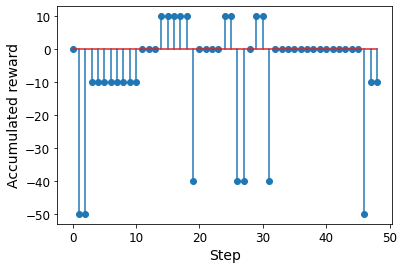

[1 0 0]


In [27]:
transition_probabilities = [ # shape=[s, a, s']
[[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
[[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
[None, [0.8, 0.1, 0.1], None]]

rewards = [ # shape=[s, a, s']
[[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
[[0, 0, 0], [0, 0, 0], [0, 0, -50]],
[[0, 0, 0], [+40, 0, 0], [0, 0, 0]]]

possible_actions = [[0, 1, 2], [0, 2], [1]]

MDP = {'A':transition_probabilities,'R':rewards,'a':possible_actions}

print('Transition probabilities:',MDP['A'][0][2][0])
print('Rewards:',MDP['R'][0][0][0])
print('Possible actions:')
for state,actions in enumerate(MDP['a']):
  print('State {}:'.format(state),actions)


seq = MDP_evolve(MDP,T=50)

plt.stem(np.cumsum(seq[:,2]))
plt.xlabel('Step')
plt.ylabel('Accumulated reward')
plt.show()

print(seq[0])

**Ejemplo 3** Aplicar el algoritmo Q-Value iterativo

In [32]:
def QValue(MDP,gamma=0.9,maxiter=50):
  #Initialize the Quality values
  Q_values = np.full((3, 3), -np.inf) # -np.inf for impossible actions
  for state, actions in enumerate(MDP['a']):
    Q_values[state, actions] = 0.0 # for all possible actions

  #Iterate:
  for iteration in range(maxiter):
    Q_prev = Q_values.copy()
    for s in range(3):
      for a in MDP['a'][s]:
        Q_values[s, a] = np.sum([ MDP['A'][s][a][sp] * (MDP['R'][s][a][sp] + gamma * np.max(Q_prev[sp])) for sp in range(3)])

  return Q_values

In [33]:
Q = QValue(MDP,gamma=0.90,maxiter=50)

print('Quality values:')
print(Q)

policy = np.argmax(Q, axis=1)
print('Optimal policy:')
print(policy)

Quality values:
[[18.91891892 17.02702702 13.62162162]
 [ 0.                -inf -4.87971488]
 [       -inf 50.13365013        -inf]]
Optimal policy:
[0 0 1]


Se resuelve el proceso con base a la policy encontrada

In [34]:
def MDP_evolve_policy(MDP,pi,T=10):
  #T number of step to evolve
  N = len(MDP['A']) #Number of states
  
  #Initial state:
  s = np.argmax(np.random.multinomial(1, np.ones(N)/N))  

  seq = []
  
  for t in range(T-1):
    #Choose the optimal action according the policy:    
    a = pi[s]

    #Sample the next state:
    s_next = np.argmax(np.random.multinomial(1, MDP['A'][s][a]))  

    #Claim the reward:
    reward = MDP['R'][s][a][s_next]

    #Append to the list:
    seq.append([s,a,reward])
    
    s = s_next

  return np.array(seq)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


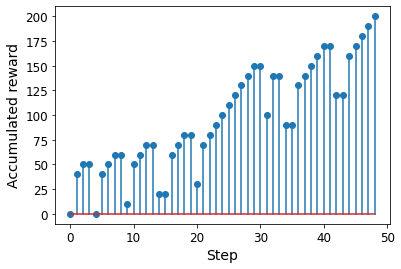

[2 1 0]


In [35]:
Q = QValue(MDP,gamma=0.95,maxiter=50)

policy = np.argmax(Q, axis=1)

seq = MDP_evolve_policy(MDP,policy,T=50)

plt.stem(np.cumsum(seq[:,2]))
plt.xlabel('Step')
plt.ylabel('Accumulated reward')
plt.show()

print(seq[0])